# Project Title: Student Performance Indicator

## Problem Statement

The objecttive of this project is to understand how variables like Gender, Ethnicity, Parental level of education, lucn, and test preparation couse affects student's performance(test scores)

## Data Collection

- Data Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
<br>
- 8 columns and 1000 rows

In [1]:
#import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import CSV data into DATAFrame
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

### Dataset Information

- gender: sex of students(Male/Female)
<br>
- race_ethnicity: Ethnicity of students(Group A,B,C,D,E)
<br>
- parental_level_of_education: Parents level of education (High school, some college, bachelor's degree, associate's degree, master,s degree)
<br>
- lunch:lunch before test(stanard, free/reduced)
<br>
- test_preparation_course: completed or not completed before test
<br>
- math_score
<br>
- reading_score
<br>
- writing_score

### Check for missing values

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset

### Check for duplicate 

In [7]:
df.duplicated().sum()

0

There are no duplicate values in the dataset

### Check data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Check the number of unique values for each column

In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### Check statistics of dataset

In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight

- The mean values for the numerical variables are very close to each other - between 66 and 68.05;
<br>
- All standard deviations are also close to each other - between 14.6 and 15.16;
<br>
- While there is a min score of 0 for math, writing has a higher min value of 10 and reading is 17

### Exploratory Data Analysis

In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
print("Categories in 'gender' variable:  ", end=" ")
print(df['gender'].unique())

print("Categories in 'race ethnicity' variable:",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [14]:
#Define numerical and categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('There are {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nThere are {} numerical features : {}'.format(len(categorical_features), categorical_features))

There are 3 numerical features : ['math score', 'reading score', 'writing score']

There are 5 numerical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [15]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


Create "Total Score" and "Average" Features

In [16]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()
                  
print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')                  

Number of students with full marks in Maths: 7
Number of students with full marks in writing: 14
Number of students with full marks in Reading: 17


In [18]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()
                  
print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')    

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in Reading: 1


Insights

- Students performed poorly in Maths section
<br>
- Students performed excellently in Reading sectiom

## Exploratory Data Analysis (Visualization)

- Visualize Average Score Distribution to draw conclusion

###  Histogram and KDE

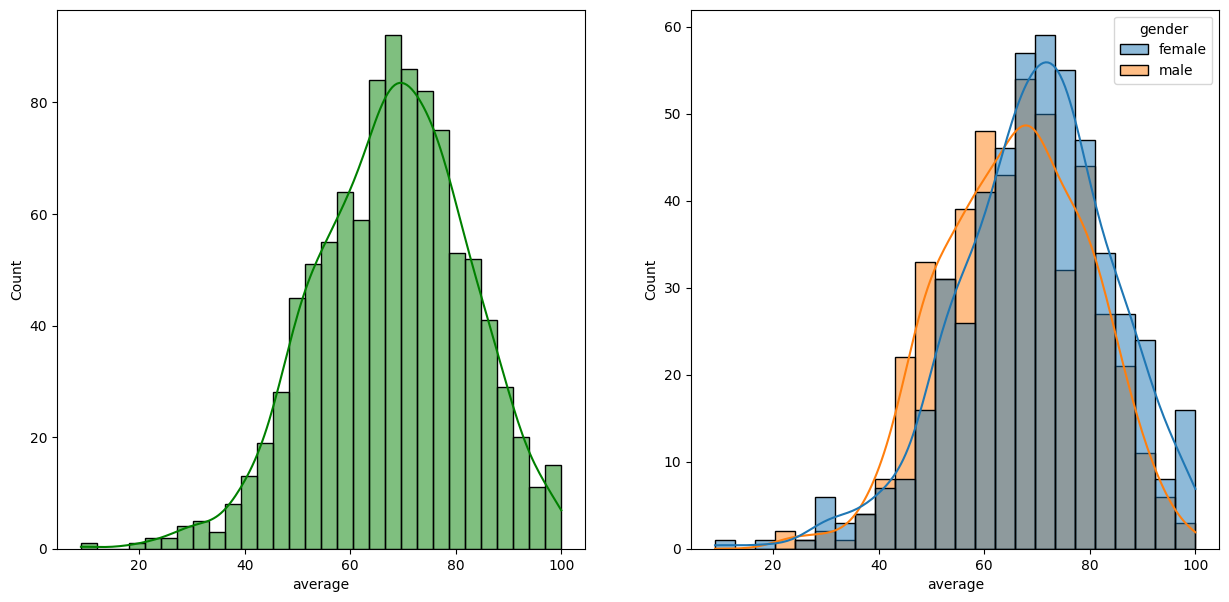

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x ='average', bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x ='average',kde=True,hue='gender')
plt.show()

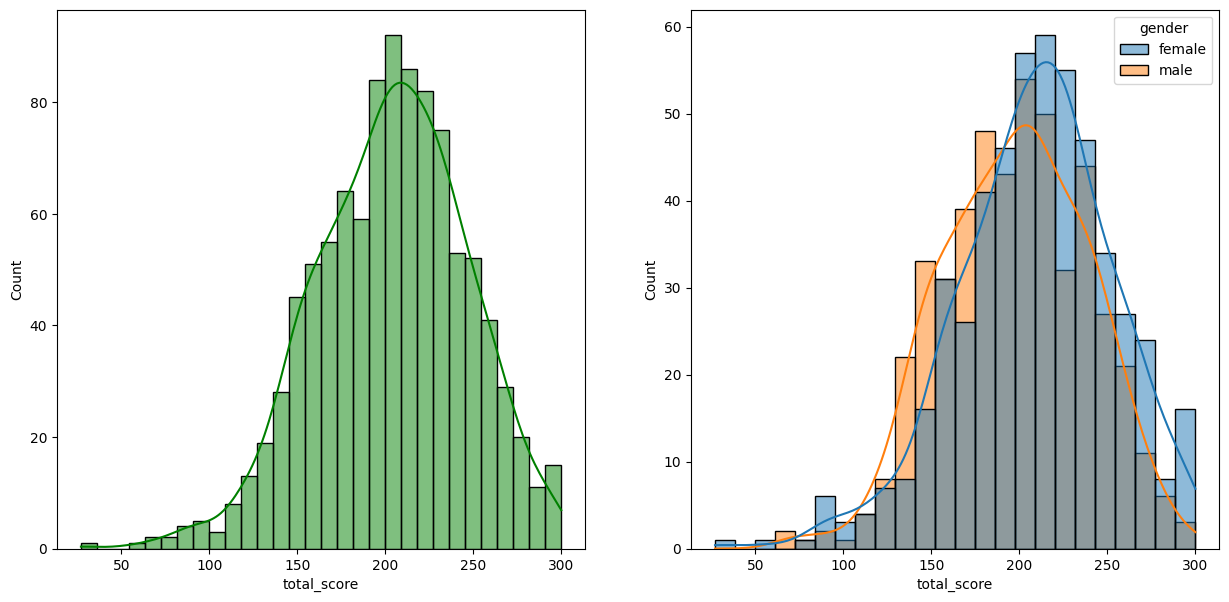

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x ='total_score', bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x ='total_score',kde=True,hue='gender')
plt.show()

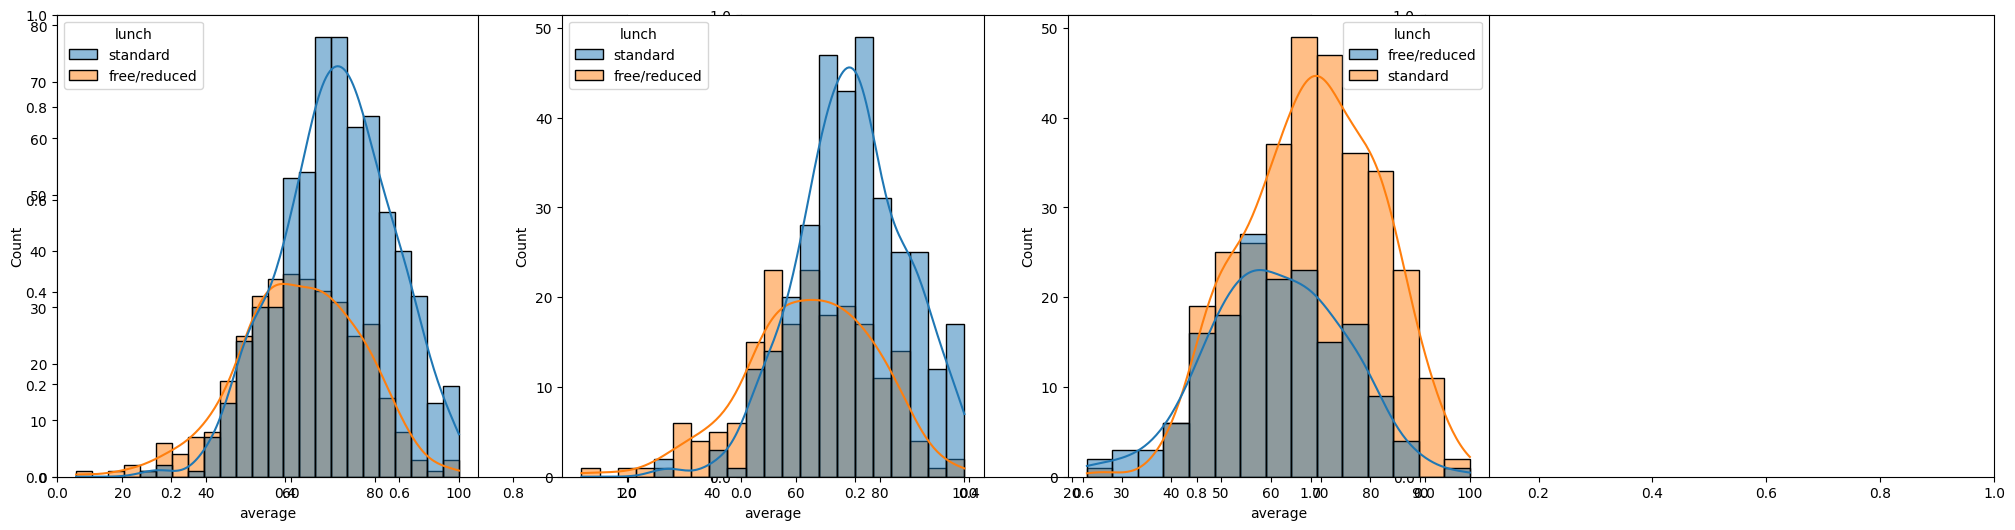

In [21]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x ='average', kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

### Insights

- Standard lunch helps perform well in exams
<br>
- Standard lunch help perfom well in exams for both male and female

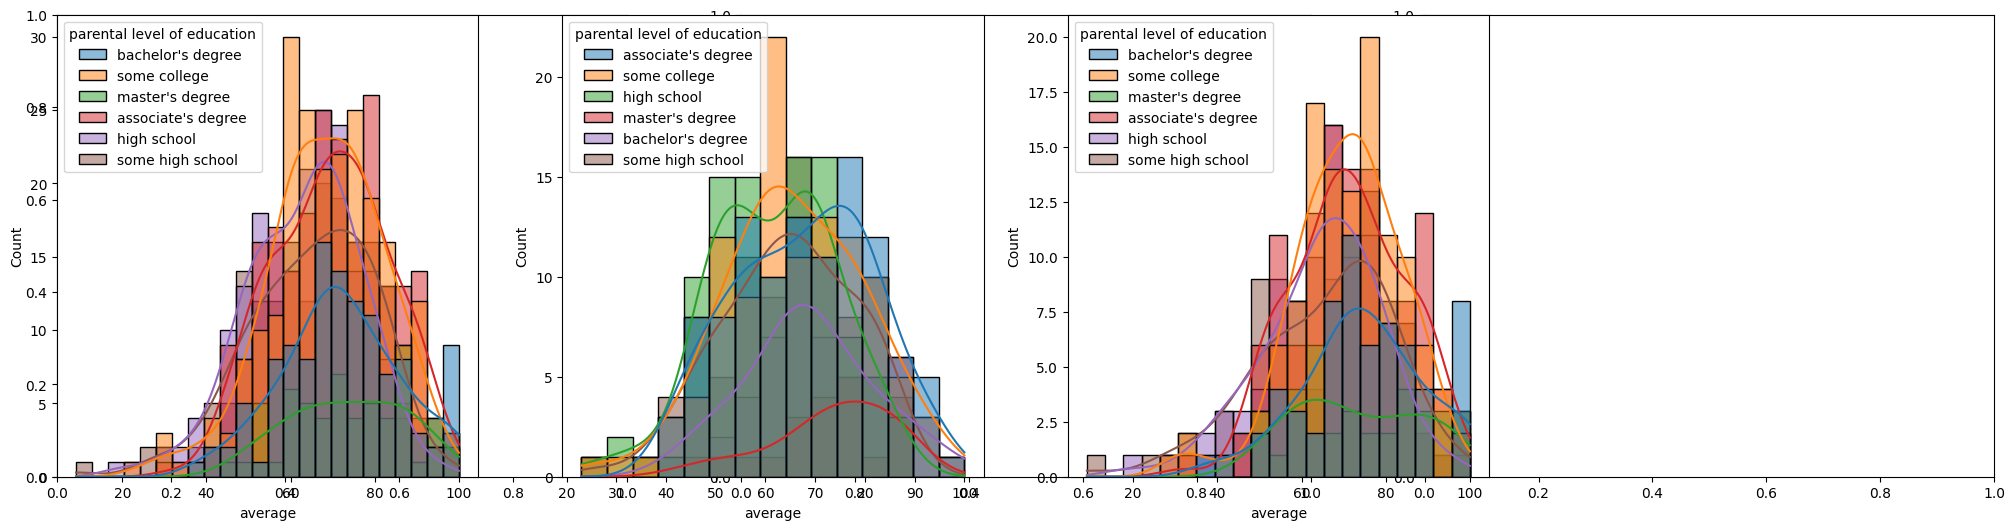

In [22]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
ax = sns.histplot(data=df,x ='average', kde=True,hue='parental level of education')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

### Insights

- In general, Parent's educational level does not have any effect on student's score
<br>
- The second plot shos that parents with associate or master's degree, their male child tend to perfom well in exam
<br>
- The third plot shows that there is no effect of the parent's educational level on the female kids

### Maximum score of students in all subjects

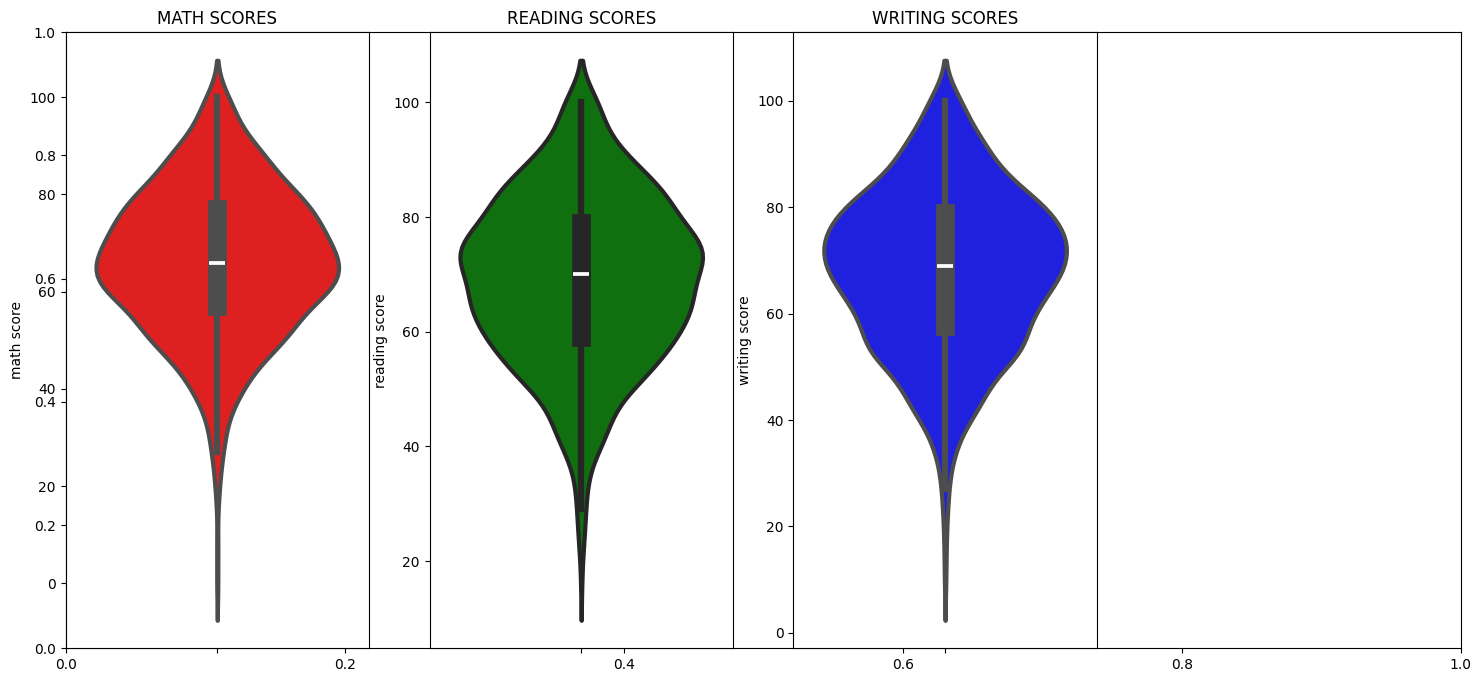

In [23]:
plt.subplots(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y ='math score', data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y ='reading score', data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORES')
sns.violinplot(y ='writing score', data=df,color='blue',linewidth=3)
plt.show()

### Insights

- The charts above clearly shows that most students scored between 60-80 in maths wile the scores for reading and writing is between 50-80

### Multivariaate analysis using pieplot

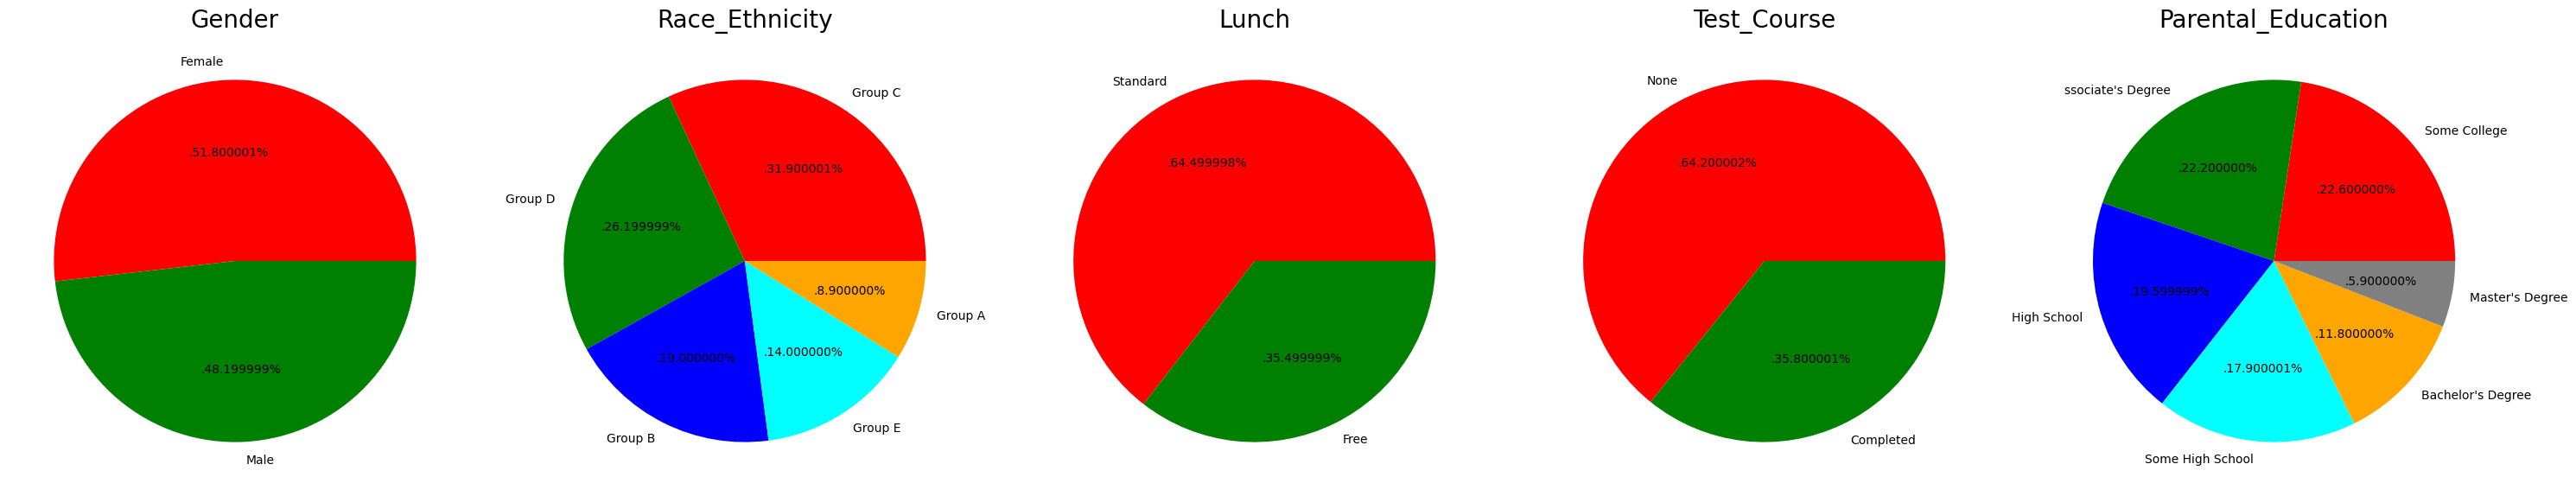

In [24]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size,colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green','blue', 'cyan', 'orange']

plt.pie(size,colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']

plt.pie(size,colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1,5,4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']


plt.pie(size, colors = color,labels=labels,autopct = '.%2f%%')
plt.title('Test_Course', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "ssociate's Degree","High School", "Some High School", "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors = color,labels=labels,autopct = '.%2f%%')
plt.title('Parental_Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

### Insight

- Number of Male and Female students is almost same
<br>
- There are more students in Group C
<br>
- There are more students who have standard lunch
<br>
- There are more students who are not enrolled in any test preparation course
<br>
- Parents with "Some College" are more followed closely by "Associate' Degree"

### Feature Wise Visualization (UNIVARIATE ANALYSIS)

### Gender Column: Look at the distribution of gender

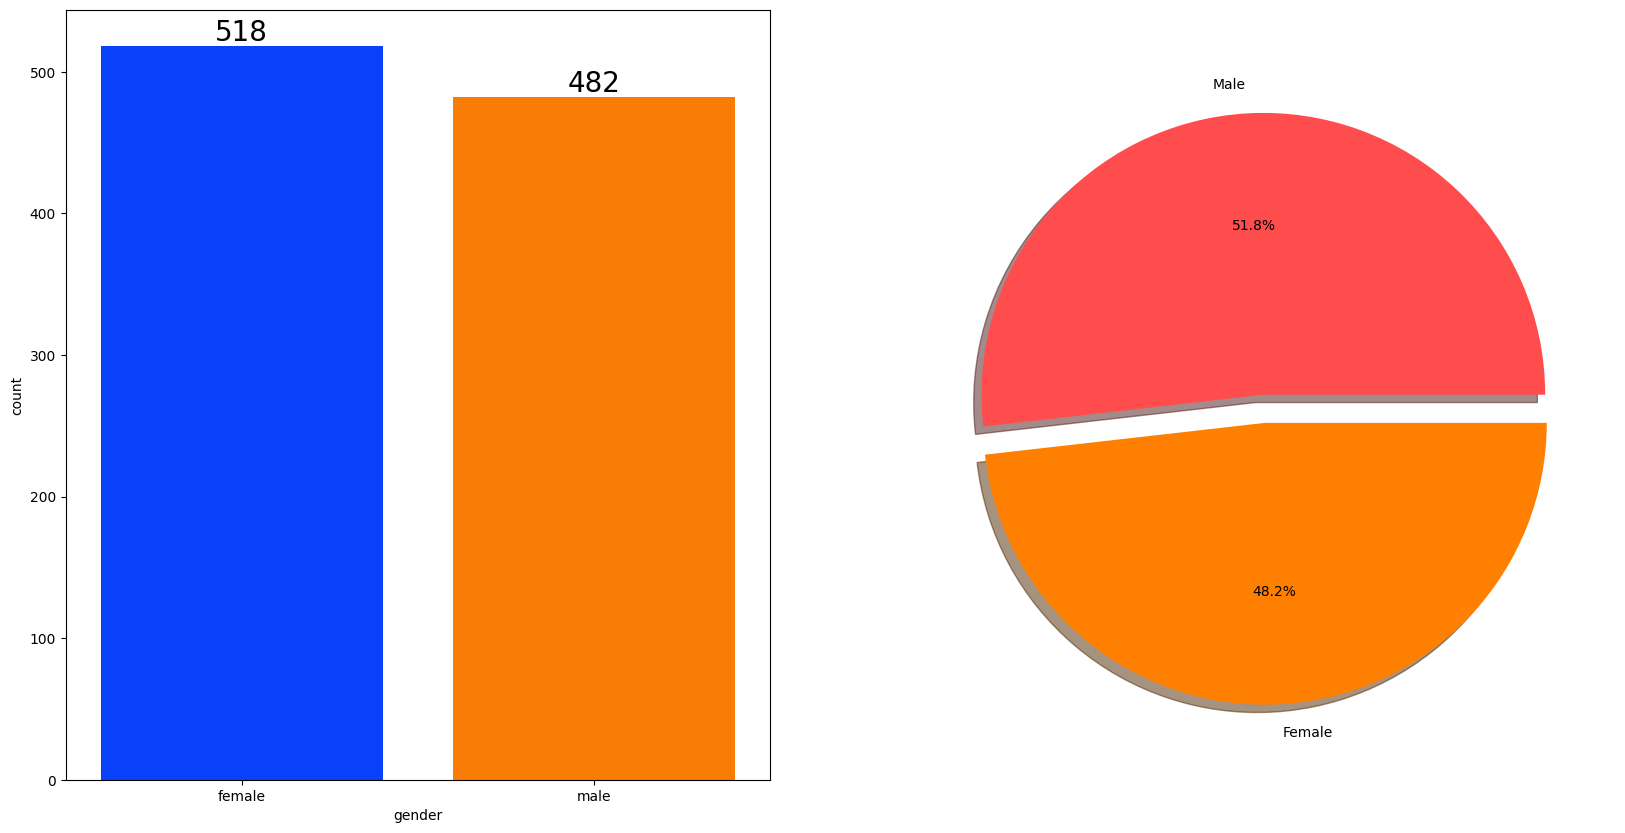

In [25]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black', size=20)
    
plt.pie(x=df['gender'].value_counts(), labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%', shadow=True,colors=['#ff4d4d', '#ff8000'])
plt.show()

Gender is well distributed with male students as 48% and female students as 48%

### Bivariate Abalysis ( Does gender have any impact of student's performance)

In [26]:
#gender_group = df.groupby('gender').mean()
#gender_group
#df['gender'].unique().value_

In [27]:
gender_group = df.groupby('gender').count()
gender_group

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
gender,,,,,,,,,
female,518,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482,482


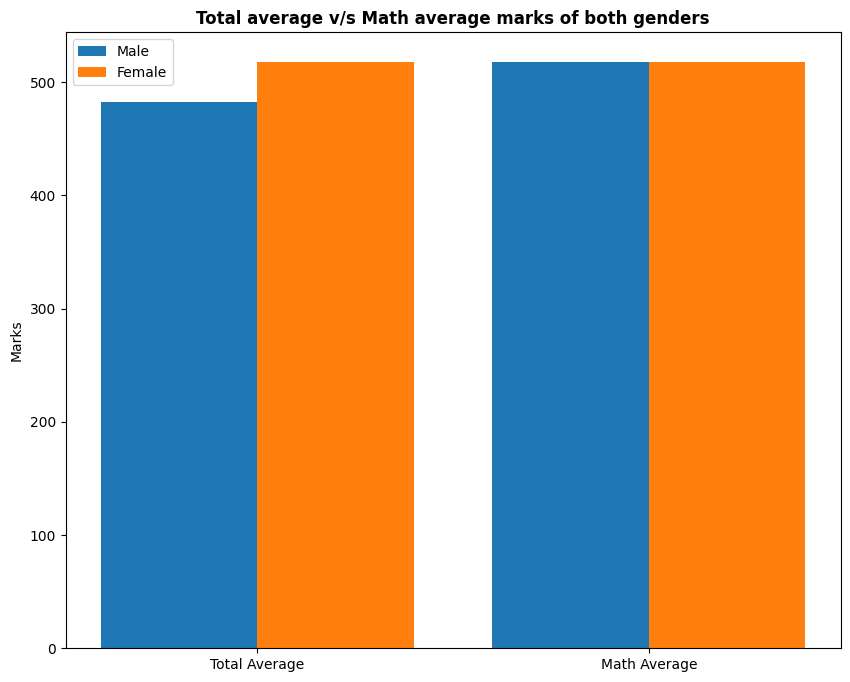

In [28]:
plt.figure(figsize=(10,8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][0]]

X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, male_scores, 0.4, label= 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label= 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both genders", fontweight='bold')
plt.legend()
plt.show()

Insights

The hart above shows that overall, female students perform better than the males students while the math score is the same for the students

### Distribution of Race/Ethnicity Coluns

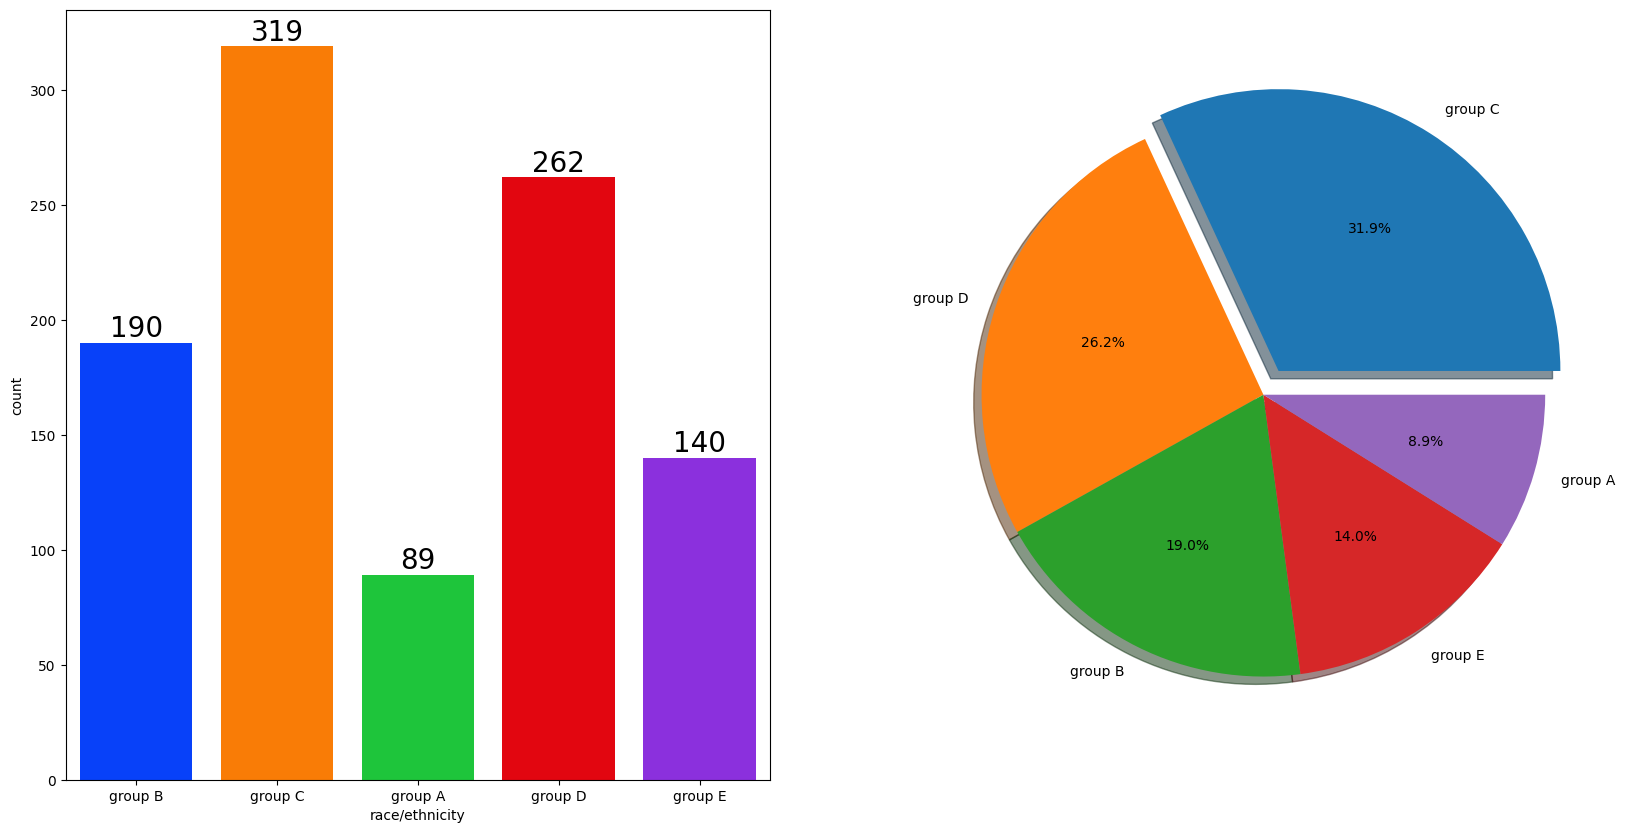

In [29]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'], data=df, palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black', size=20)
    
plt.pie(x=df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%', shadow=True)
plt.show()

- Group A has the lowest number of students.
<br>
- Most of the students belong to Group c and Group D

### Bivariate Analysis: Check the impact of race/ethnicity on student's performance

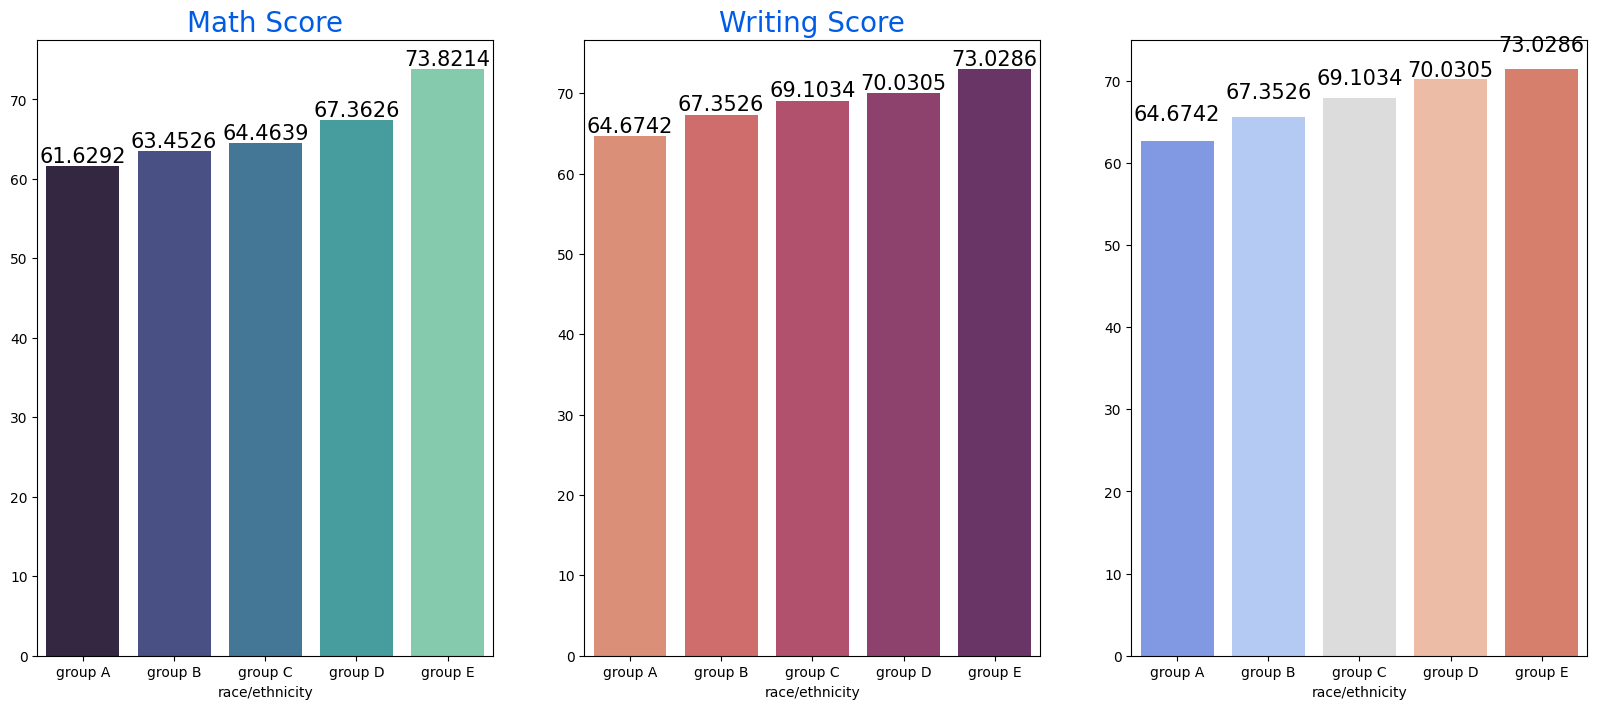

In [30]:
group_data2 = df.groupby('race/ethnicity')
f,ax = plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=group_data2['math score'].mean().index, y=group_data2['math score'].mean().values, palette='mako',ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black', size=15)
    

sns.barplot(x=group_data2['reading score'].mean().index, y=group_data2['reading score'].mean().values, palette='flare',ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black', size=15)
    
sns.barplot(x=group_data2['writing score'].mean().index, y=group_data2['writing score'].mean().values, palette='coolwarm',ax=ax[2])
ax[1].set_title('Writing Score', color='#005ce6', size=20)

for container in ax[1].containers:
    ax[2].bar_label(container,color='black', size=15)

Insights

- Students from group E have the highest score
<br>
- Group A students have the lowest score
<br>
- The students from lower socioeconomic status have a lower average score in all courses

### Univariate Analysis (Parent's Level of Education)

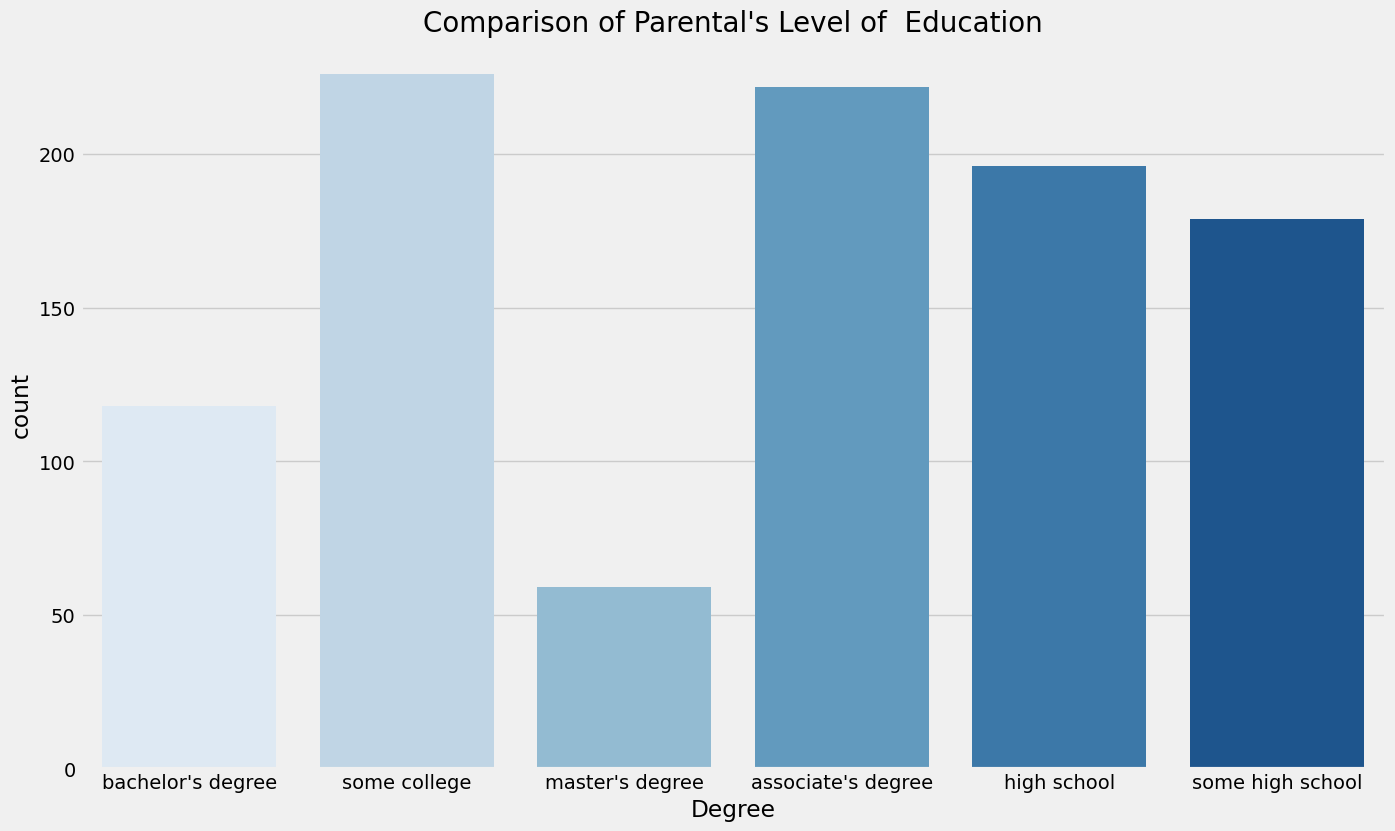

In [31]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental level of education'], palette = 'Blues')
plt.title("Comparison of Parental's Level of  Education", fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

- Most of the parents have 'some college' level of education

### Bivariate Analysis (Does Parent's Level of Education have any impact of student's performance?)

In [32]:
df.groupby('parental level of education').count().agg('mean')

gender                     166.666667
race/ethnicity             166.666667
lunch                      166.666667
test preparation course    166.666667
math score                 166.666667
reading score              166.666667
writing score              166.666667
total_score                166.666667
average                    166.666667
dtype: float64

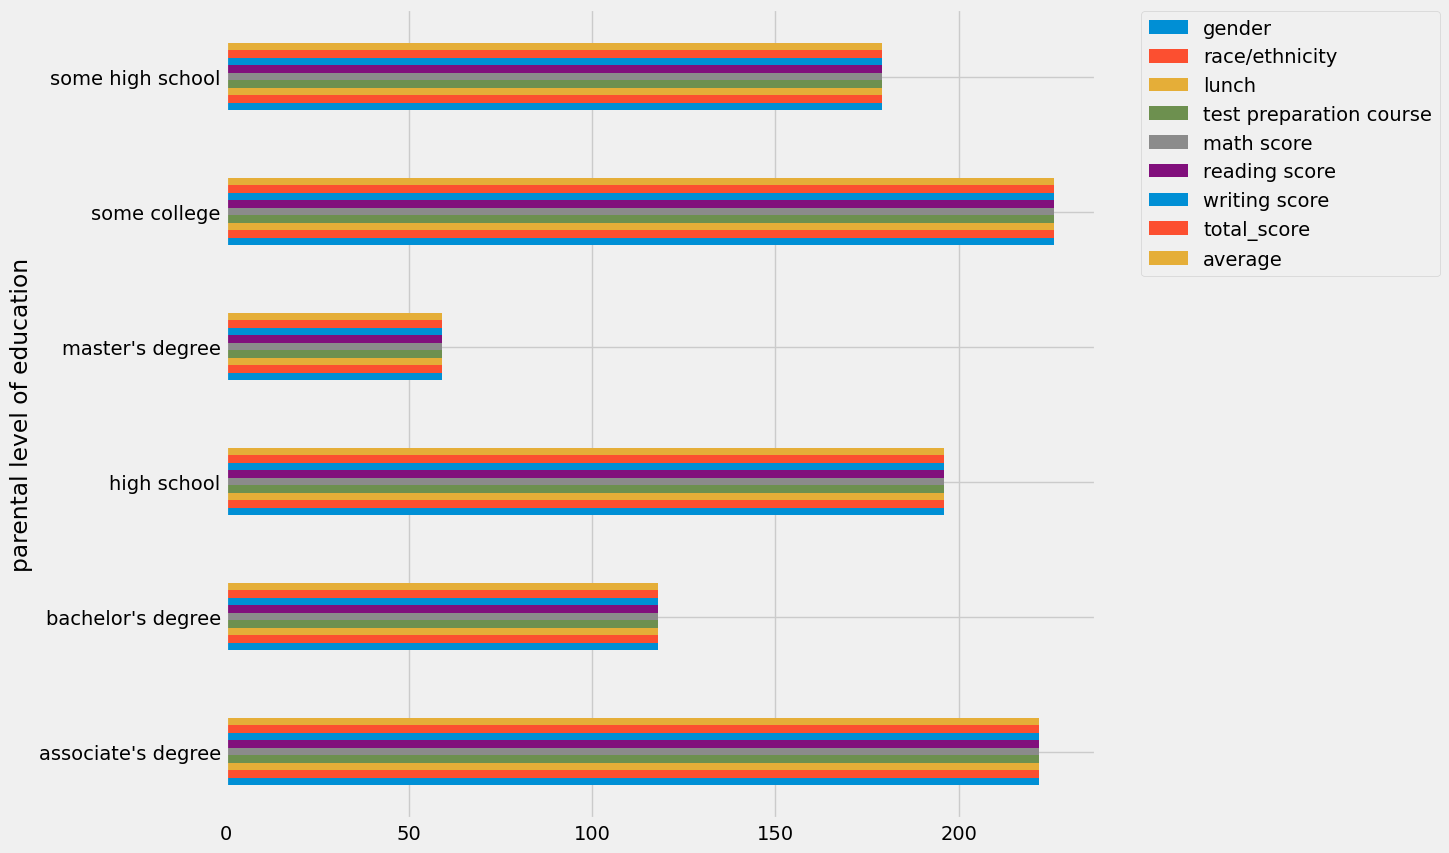

In [33]:
df.groupby('parental level of education').count().plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.1)
plt.show()

### UNIVARIATE ANALYSIS(Explore the Lunch that students have)

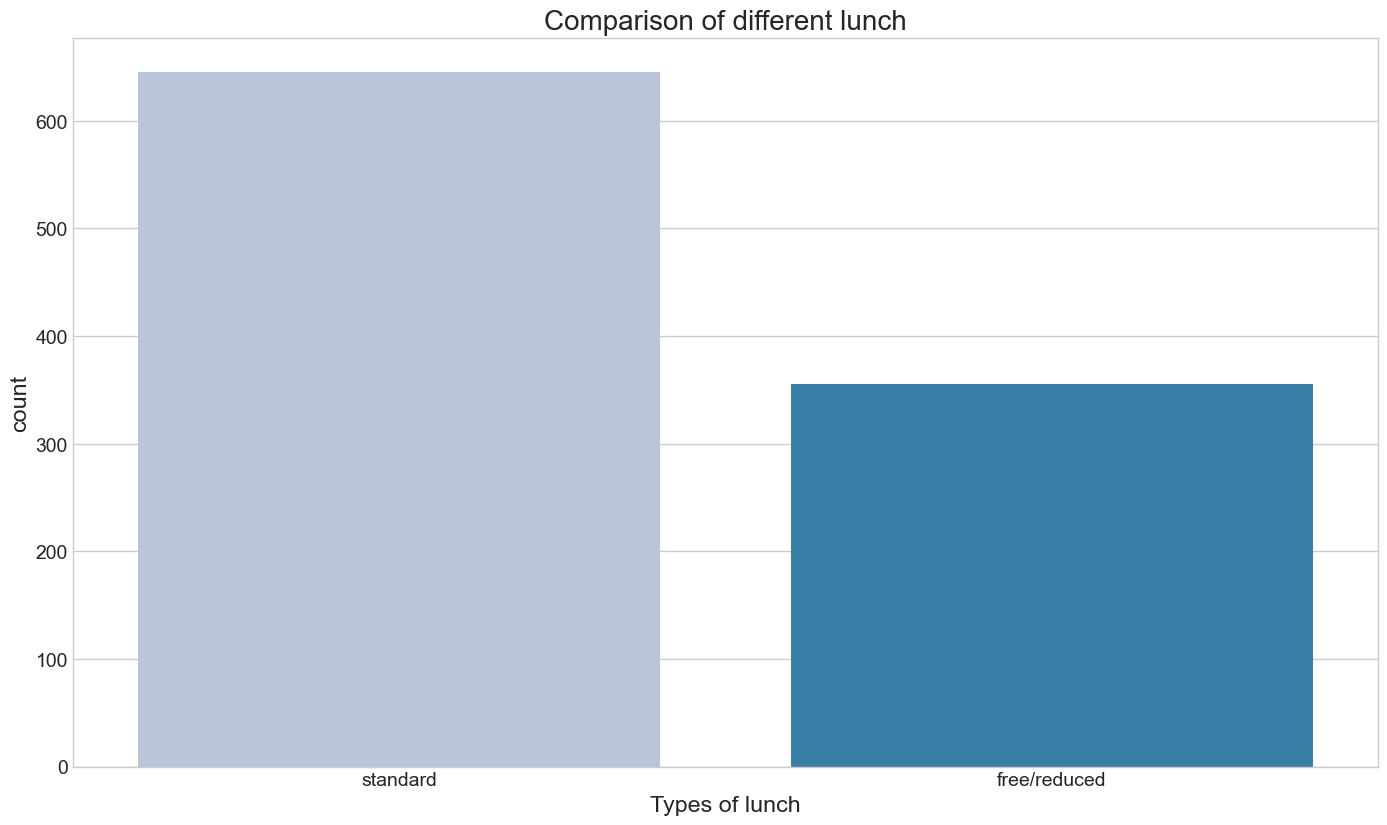

In [36]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use("seaborn-v0_8-whitegrid")
sns.countplot(x=df['lunch'], palette = 'PuBu')
plt.title("Comparison of different lunch", fontweight = 30, fontsize = 20)
plt.xlabel('Types of lunch')
plt.ylabel('count')
plt.show()

- Most students were served standard lunch

### Bivariate Analysis: Does lunch have any impact of student performance?

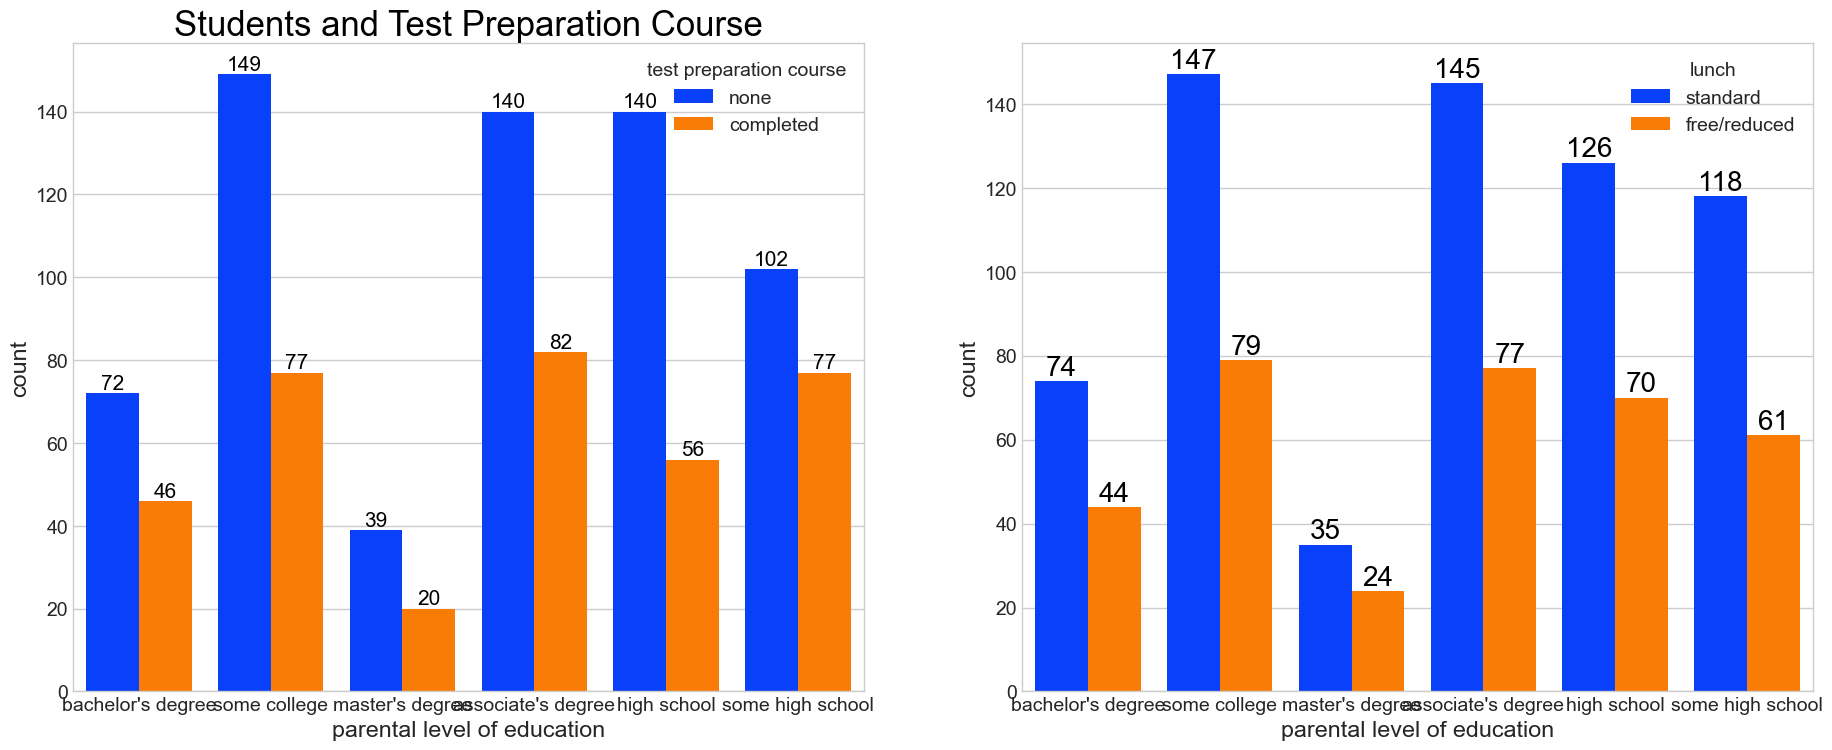

In [37]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df, palette='bright', hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students and Test Preparation Course', color='black', size=25)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black', size=15)
    
    
sns.countplot(x=df['parental level of education'],data=df, palette='bright', hue='lunch', saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black', size=20)
      

- Students who have standard lunch perform better

### Explore Test Preparation Course Column and its Impact of Student's Performance

<Axes: xlabel='lunch', ylabel='writing score'>

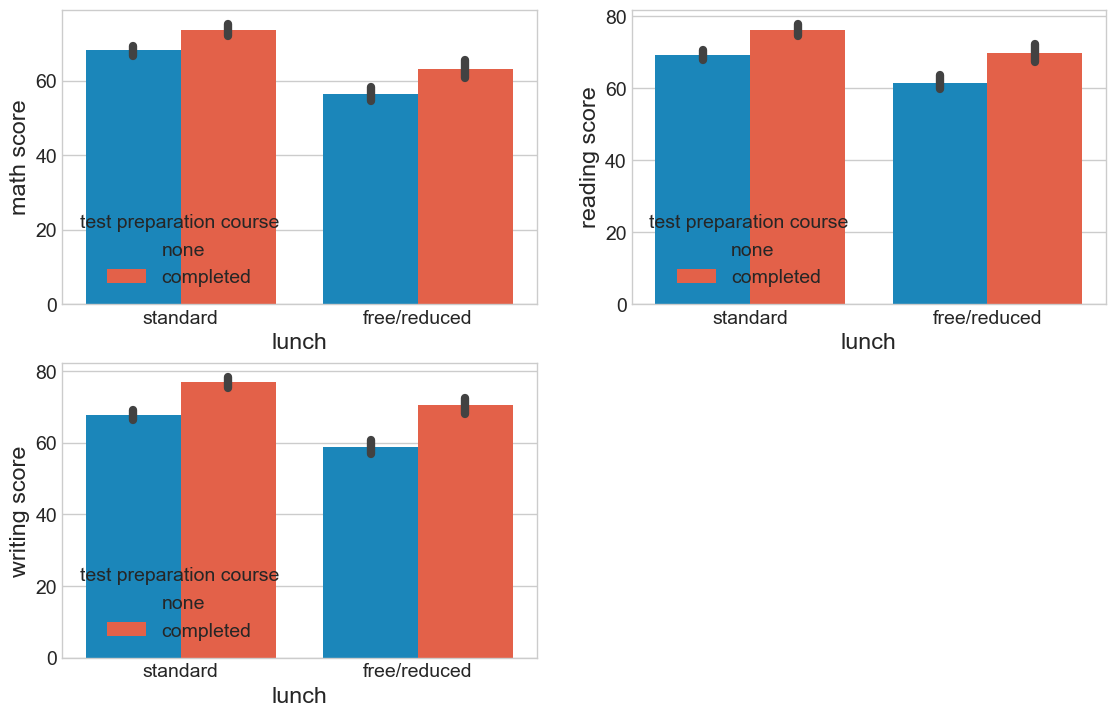

In [38]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

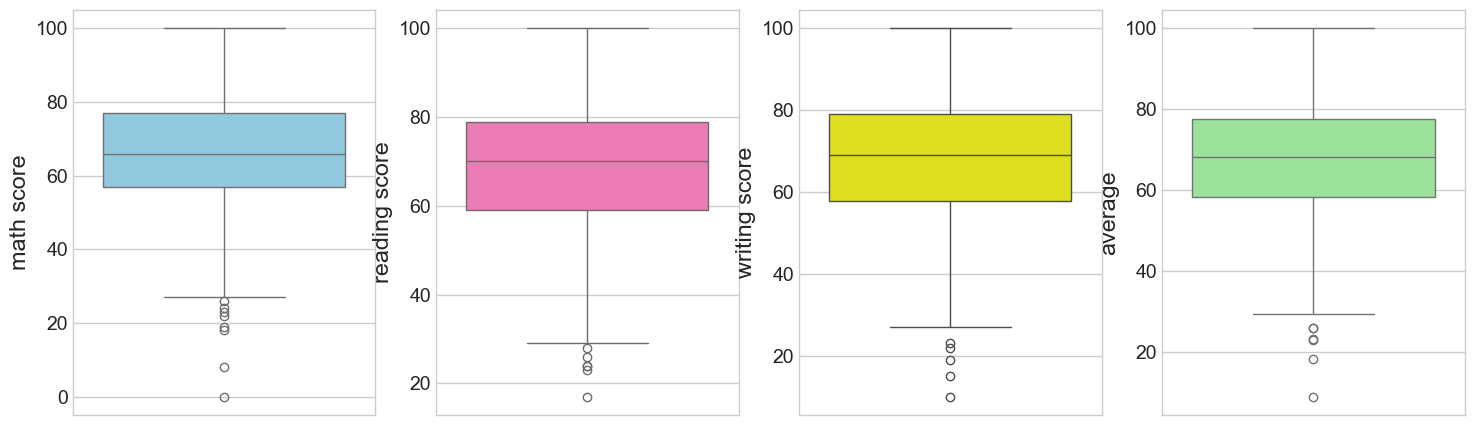

In [39]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'], color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'], color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'], color='yellow')
plt.subplot(144)
sns.boxplot(df['average'], color='lightgreen')
plt.show()

### Multivariate Analysis Using Pairplot

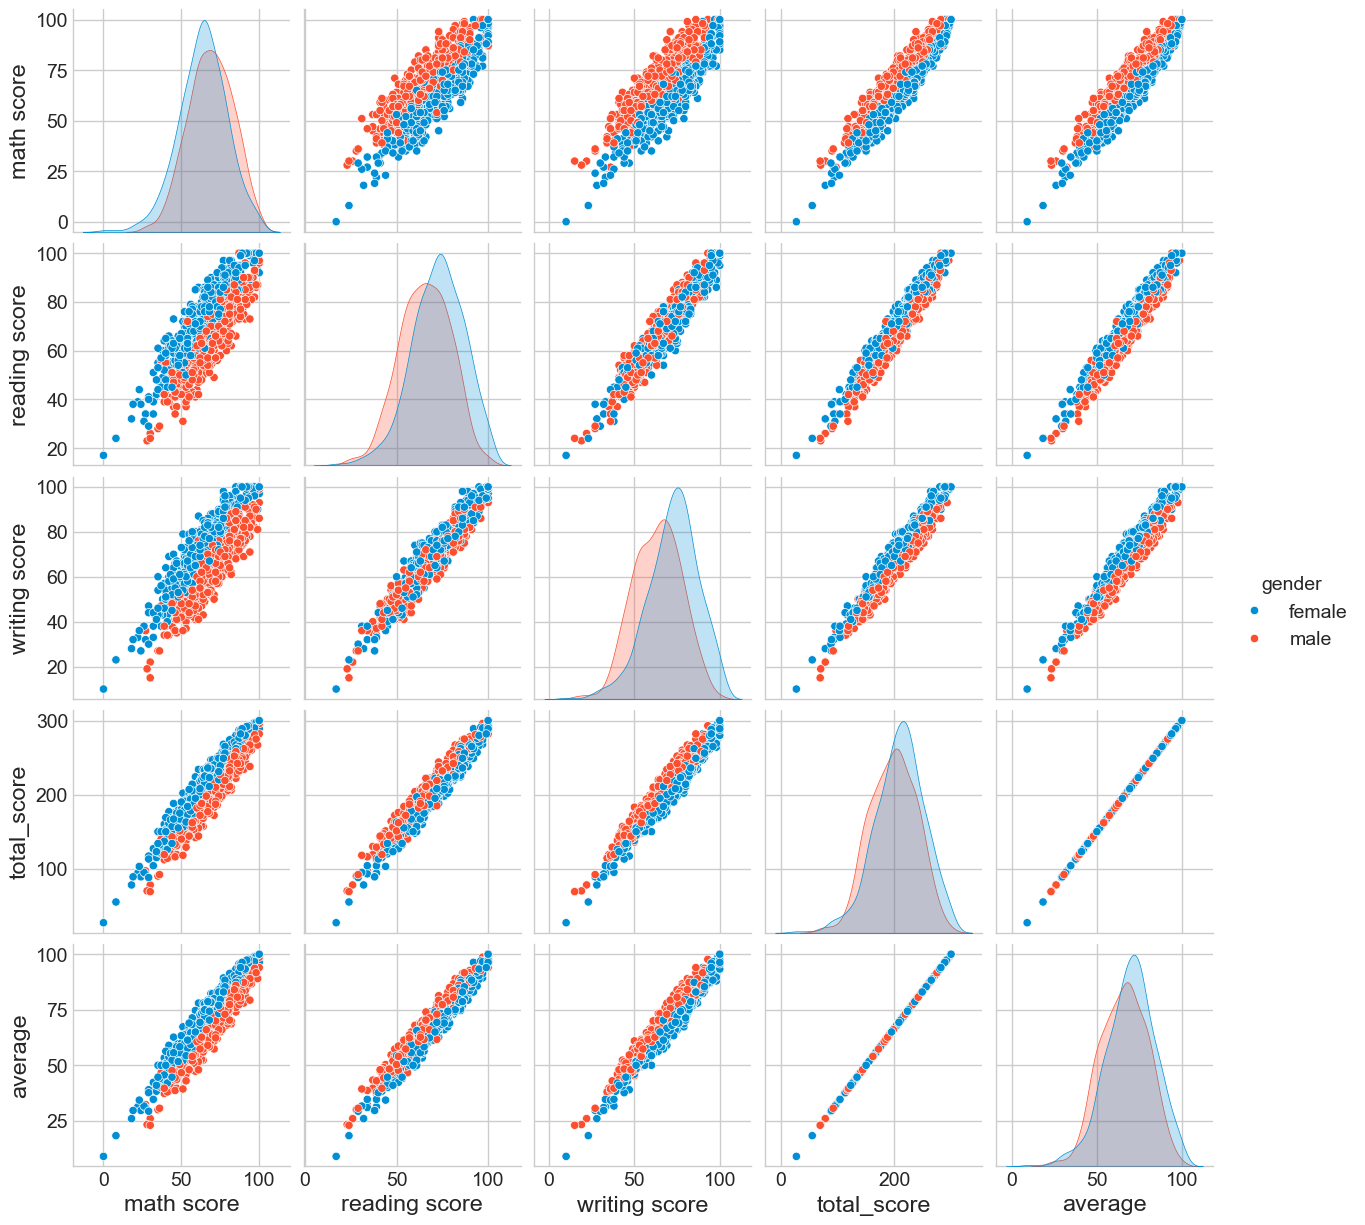

In [40]:
sns.pairplot(df, hue = 'gender')
plt.show()

Insights

From the above plot, we can see that all scores increase linearly with each other

### Conclusion

- Test preparation course does not have so much impact on sudent's performance
<br>
- Finishing the preparation course is relevant and helped performace
<br>
- Females score higher than males and they also lead in pass percentage
<br>
- Race, lunch and parental level of education has effect on student's performance